In [79]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import os
import datetime
import matplotlib.pyplot as plt

In [90]:
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

In [3]:
train_dir = './open/train_input/'
train_dirs = os.listdir(train_dir)
target_dir = './open/train_target/'
target_dirs = os.listdir(target_dir)

In [4]:
train_input = []
for i in train_dirs: train_input.append(pd.read_csv(train_dir + i))
target_input = []
for i in target_dirs: target_input.append(pd.read_csv(target_dir + i))

In [5]:
for i in range(len(train_input)):
    train_input[i].iloc[:,1:].dropna(inplace=True)
    target_input[i].dropna(inplace=True)

In [6]:
# train_input[42].시간 = pd.to_datetime(train_input[42].시간)
# train_input[42].시간 = train_input[42].시간.dt.date
# target_input[42].시간 = pd.to_datetime(target_input[42].시간)
# target_input[42].시간 = target_input[42].시간.dt.date

In [7]:
# train_input[42].시간.unique()

In [8]:
# 43번 target에 22일 기록이 없음 => train의 21일 기록을 나중에 지우기
# target_input[42].시간.unique()

In [ ]:
for i in range(len(train_input)):
    print(train_input[i].shape, target_input[i].shape)

In [10]:
for i in range(len(train_input)):
    train_input[i].시간 = pd.to_datetime(train_input[i].시간)
    train_input[i].시간 = train_input[i].시간.dt.date
    
    df2 = train_input[i][train_input[i].시간 == train_input[i].시간.unique()[0]].iloc[:,1:].mean()
    for j in train_input[i].시간.unique()[1:]:
        df3 = train_input[i][train_input[i].시간 == j].iloc[:,1:].mean()
        df2 = pd.concat([df2, df3], axis = 1)
    df2 = df2.transpose()
    train_input[i] = df2.reset_index(drop = True)

In [11]:
for i in range(len(target_input)):
    target_input[i].시간 = pd.to_datetime(target_input[i].시간)
    target_input[i].시간 = target_input[i].시간.dt.date
    target_input[i].시간 = target_input[i].시간.astype(str)

In [12]:
target_input[0].head()

,시간,rate
0,2021-02-18,0.50000
1,2021-02-19,0.66667
2,2021-02-20,0.60000
3,2021-02-21,-0.12500
4,2021-02-22,1.42857


In [13]:
# train의 21일 기록 지우기
train_input[42].drop(0, inplace=True)

In [14]:
# train, target 하나로 만들기
train_input_final = train_input[0]
target_input_final = target_input[0]

for i in range(1, len(train_input)):
    train_input_final = pd.concat([train_input_final, train_input[i]])
    target_input_final = pd.concat([target_input_final, target_input[i]])

train_input_final = train_input_final.reset_index(drop = True)
target_input_final = target_input_final.reset_index(drop = True)

In [ ]:
for i in range(len(train_input)):
    print(train_input[i].isnull().sum())

In [16]:
train_input_final.isnull().sum()

내부온도관측치            22
내부습도관측치            22
CO2관측치             22
EC관측치              22
외부온도관측치           748
외부습도관측치           748
펌프상태               22
펌프작동남은시간           22
최근분무량             394
일간누적분무량           478
냉방상태               22
냉방작동남은시간           22
난방상태               22
난방작동남은시간           22
내부유동팬상태            22
내부유동팬작동남은시간        22
외부환기팬상태            22
외부환기팬작동남은시간        22
화이트 LED상태          22
화이트 LED작동남은시간      22
화이트 LED동작강도        22
레드 LED상태           22
레드 LED작동남은시간       22
레드 LED동작강도         22
블루 LED상태           22
블루 LED작동남은시간       22
블루 LED동작강도         22
카메라상태              22
냉방온도               22
난방온도               22
기준온도               22
난방부하               22
냉방부하               22
총추정광량              22
백색광추정광량            22
적색광추정광량            22
청색광추정광량            22
펌프작동남은시간.1       1729
외부온도추정관측치        1327
외부습도추정관측치        1327
펌프최근분무량          1441
펌프일간누적분무량        1441
dtype: int64

In [ ]:
# 결측치 처리
train_input_final[train_input_final.isnull()] = 0  
train_input_final.isnull().sum()

In [18]:
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.utils import all_estimators
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel

In [19]:
train_input_final.shape, target_input_final.shape

((1813, 42), (1813, 2))

In [95]:
train_x, test_x, train_y, test_y = train_test_split(train_input_final,\
     target_input_final.rate, test_size=0.2, random_state=42)

In [96]:
train_x.shape, train_y.shape

((1450, 42), (1450,))

In [97]:
# models = all_estimators(type_filter='regressor')
# scores = []
# names = []
# for name, model in models:
#     try:
#         # 모델 객체 생성
#         md = model()
#         # 학습
#         md.fit(train_x, train_y)
#         # 평가
#         result = md.score(test_x, test_y)
#         scores.append((name, np.round(result,3)))
#         names.append(name)
#     except: pass

In [98]:
# scores

In [137]:
scaler = StandardScaler()
scaler.fit(train_x)

StandardScaler()

In [138]:
train_x_scale = scaler.transform(train_x)
test_x_scale = scaler.transform(test_x)

In [139]:
# RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt

In [187]:
model_rf = RandomForestRegressor()
model_rf.fit(train_x_scale, train_y)
train_score = model_rf.score(train_x_scale, train_y)
test_score = model_rf.score(test_x_scale, test_y)
print('train, test:', train_score, test_score)
predict_y = model_rf.predict(test_x_scale)
rms = sqrt(mean_squared_error(test_y, predict_y))
print(i, j, 'RMSE :', rms)

train, test: 0.8084946389242045 -0.03434301729482292
150 15 RMSE : 3.159363481519175


In [188]:
model_rf = RandomForestRegressor()
select_rf = SelectFromModel(model_rf, threshold='mean')
select_rf.fit(train_x_scale, train_y)
train_x_selected = select_rf.transform(train_x_scale)
test_x_selected = select_rf.transform(test_x_scale)
select_rf.get_support()

array([ True,  True,  True,  True, False,  True, False, False, False,
       False,  True, False,  True,  True, False, False, False,  True,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False])

In [189]:
# 특성 선택
train_x_rf = train_x.iloc[:, np.where(select_rf.get_support() == True)[0].tolist()]
test_x_rf = test_x.iloc[:, np.where(select_rf.get_support() == True)[0].tolist()]

In [190]:
scaler = StandardScaler()
scaler.fit(train_x_rf)
train_x_scale_rf = scaler.transform(train_x_rf)
test_x_scale_rf = scaler.transform(test_x_rf)

In [191]:
model_rf = RandomForestRegressor()
model_rf.fit(train_x_rf, train_y)
bestMode = model_rf.base_estimator_
train_score = model_rf.score(train_x_scale_rf, train_y)
test_score = model_rf.score(test_x_scale_rf, test_y)
print('train, test:', train_score, test_score)

train, test: -0.1845587963856794 -0.0024772772975651947


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


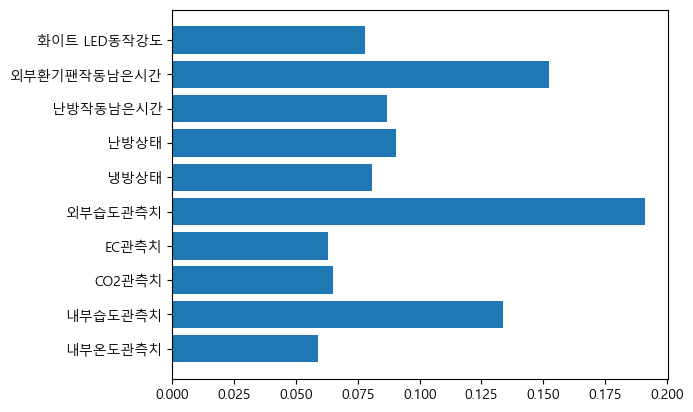

In [192]:
plt.barh(y=train_x_rf.columns, width = model_rf.feature_importances_)
plt.show()

In [193]:
for i in (10, 20, 30, 40, 100, 150):
  for j in (None, 5, 10, 15):
    model = RandomForestRegressor(n_estimators = i, random_state = 42, max_depth=j)
    model.fit(train_x_scale_rf, train_y)

    relation_square = model.score(test_x_scale_rf, test_y)
    print(i, j, '결정계수 : ', relation_square)
    predict_y = model.predict(test_x_scale_rf)
    rms = sqrt(mean_squared_error(test_y, predict_y))
    print(i, j, 'RMSE :', rms)


10 None 결정계수 :  -0.05252389428187909
10 None RMSE : 3.1870089449696706
10 5 결정계수 :  -0.037343851392030336
10 5 RMSE : 3.1639431321249982
10 10 결정계수 :  -0.04731312594953829
10 10 RMSE : 3.1791101360488265
10 15 결정계수 :  -0.04920937285045146
10 15 RMSE : 3.1819868552182937
20 None 결정계수 :  -0.0355023678870634
20 None RMSE : 3.161133582958186
20 5 결정계수 :  -0.01836273376781561
20 5 RMSE : 3.134862881312266
20 10 결정계수 :  -0.02740796578256055
20 10 RMSE : 3.1487542359270835
20 15 결정계수 :  -0.03170376924837037
20 15 RMSE : 3.155330162967816
30 None 결정계수 :  -0.04126606639063546
30 None RMSE : 3.169918950570012
30 5 결정계수 :  -0.02208375405601548
30 5 RMSE : 3.1405849348419883
30 10 결정계수 :  -0.03410462775183554
30 10 RMSE : 3.1589993844039683
30 15 결정계수 :  -0.037334089343549204
30 15 RMSE : 3.163928244757193
40 None 결정계수 :  -0.03723404325700064
40 None RMSE : 3.163775667938017
40 5 결정계수 :  -0.017287091374526886
40 5 RMSE : 3.1332068494363923
40 10 결정계수 :  -0.028712308005341303
40 10 RMSE : 3.1507523

In [159]:
i, j = 20, 5

model = RandomForestRegressor(n_estimators = i, random_state = 42, max_depth=j)
model.fit(train_x_scale_rf, train_y)

relation_square = model.score(test_x_scale_rf, test_y)
print(i, j, '결정계수 : ', relation_square)
predict_y = model.predict(test_x_scale_rf)
rms = sqrt(mean_squared_error(test_y, predict_y))
print(i, j, 'RMSE :', rms)

20 5 결정계수 :  -0.02102913266389672
20 5 RMSE : 3.1389642345441535


In [161]:
model.predict(test_x_scale_rf)

array([ 3.02495486e-01,  3.37586763e-01,  2.15183806e-02,  1.23217301e-01,
        3.19482200e-01,  3.61398385e-01,  7.73099935e-02,  3.52885533e-01,
        4.21351165e-01,  3.13043625e-01,  3.86020166e-01,  3.68091953e-01,
        1.29481837e-01,  2.95981486e-01,  3.38590531e-01,  3.20802205e-01,
        2.51774166e-01,  2.36658643e-01,  2.31512270e-01,  3.61577952e-01,
        2.34608021e-01,  3.71296479e-01,  3.17963945e+00,  1.30864482e-01,
        2.13211808e-01,  2.16743002e-01,  3.61942470e-01,  1.19676799e-01,
        2.36658643e-01,  2.55180434e-01,  2.75250485e-01,  2.45559215e-01,
        1.27323980e-01,  3.51222706e-01,  1.87092429e-01,  3.72792730e-01,
        2.25390205e-01,  2.36658643e-01,  1.69287646e-01,  4.92207857e+00,
        1.23552297e-01,  3.84198698e-01,  3.08320497e-01,  3.85062079e-01,
        1.21409482e-01,  3.79534788e-02,  2.95256021e-01,  4.58802502e-02,
        2.95260080e-01,  3.68091953e-01,  2.96971718e-01,  2.16113408e-01,
        8.09754614e-02,  

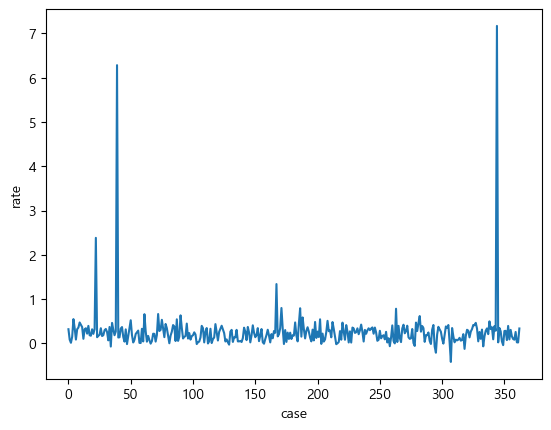

In [198]:
plt.plot(range(len(test_x_scale_rf)) ,model.predict(test_x_scale_rf))
plt.xlabel('case')
plt.ylabel('rate')
plt.show()

In [114]:
# SVR
from sklearn.svm import SVR

In [201]:
model = SVR()
model.fit(train_x_scale, train_y)
relation_square = model.score(train_x_scale, train_y)
print('Score :', relation_square)
predict_y = model.predict(test_x_scale)
rms = sqrt(mean_squared_error(test_y, predict_y))
print('RMSE :', rms)

Score : 0.04101820946488788
RMSE : 3.1141592361001282


In [170]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import Lasso

In [180]:
model = AdaBoostRegressor(base_estimator=Lasso())
model.fit(train_x_scale, train_y)
print('Score :', model.score(test_x_scale, test_y))
predict_y = model.predict(test_x_scale)
rms = sqrt(mean_squared_error(test_y, predict_y))
print('RMSE :', rms)

Score : -0.007201256382220134
RMSE : 3.117636159091886


In [204]:
# XGBoost

from xgboost import XGBRegressor
from sklearn.metrics import explained_variance_score

In [205]:
model = XGBRegressor()
model.fit(train_x_scale, train_y)
print('Score :', model.score(test_x_scale, test_y))
predict_y = model.predict(test_x_scale)
rms = sqrt(mean_squared_error(test_y, predict_y))
print('RMSE :', rms)

Score : -0.091066495958259
RMSE : 3.244837185855142


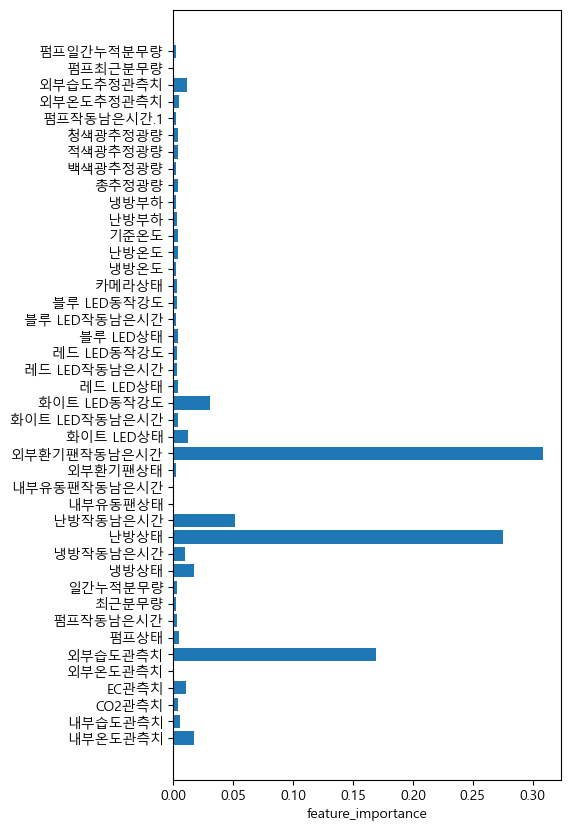

In [224]:
plt.figure(figsize=(5, 10))
plt.barh(y= train_x.columns, width = model.feature_importances_)
plt.xlabel('feature_importance')
plt.show()

In [226]:
model_xgb = XGBRegressor()
select = SelectFromModel(model_xgb, threshold='mean')
select.fit(train_x_scale, train_y)
train_x_selected = select.transform(train_x_scale)
test_x_selected = select.transform(test_x_scale)
select.get_support()

array([False, False, False, False, False,  True, False, False, False,
       False, False, False,  True,  True, False, False, False,  True,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False])

In [227]:
# 특성 선택
train_x_xgb = train_x.iloc[:, np.where(select.get_support() == True)[0].tolist()]
test_x_xgb = test_x.iloc[:, np.where(select.get_support() == True)[0].tolist()]

In [228]:
scaler = StandardScaler()
scaler.fit(train_x_xgb)
train_x_scale_xgb = scaler.transform(train_x_xgb)
test_x_scale_xgb = scaler.transform(test_x_xgb)

In [233]:
model_xgb = XGBRegressor()
model_xgb.fit(train_x_scale_xgb, train_y)
train_score = model_xgb.score(train_x_scale_xgb, train_y)
test_score = model_xgb.score(test_x_scale_xgb, test_y)
print('train, test:', train_score, test_score)
predict_y = model_xgb.predict(test_x_scale_xgb)
rms = sqrt(mean_squared_error(test_y, predict_y))
print('RMSE :', rms)

train, test: 0.9744756867509019 -0.012530050384224278
RMSE : 3.125872509474705


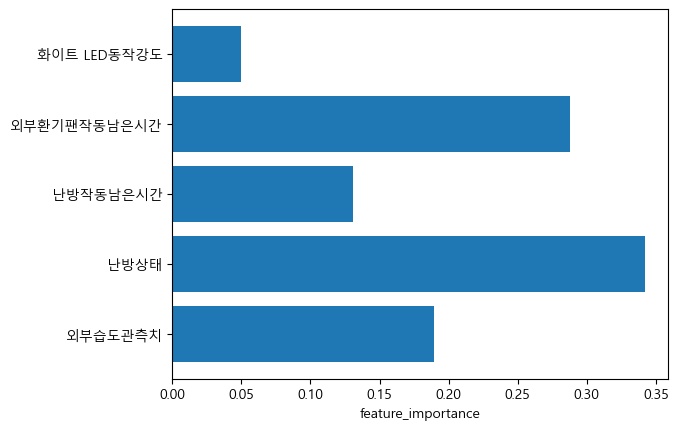

In [231]:
plt.barh(y=train_x_xgb.columns, width = model_xgb.feature_importances_)
plt.xlabel('feature_importance')
plt.show()